In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Task - 1: Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity. 

In [7]:
# Import the dataset
df = pd.read_csv('Real estate.csv')

In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.shape

(414, 8)

In [10]:
columns = list(df.columns)

In [11]:
columns = [col.replace(' ','_') for col in columns]

# Task - 2 : Handle missing values in the dataset, deciding on an appropriate strategy 

In [13]:
# Check for missing values
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Task -4 : Filter and subset the data based on specific criteria, such as a particular time period, property type, or location. 

In [22]:
# Step 4: Filter data based on specific criteria
# Filter properties that were sold in 2013 or later
df_filtered = df[df['X1 transaction date'] >= 2013]

In [24]:
print("Filtered data based on transaction date:")
print(df_filtered.head())

Filtered data based on transaction date:
   No  X1 transaction date  X2 house age  \
2   3             2013.583          13.3   
3   4             2013.500          13.3   
7   8             2013.417          20.3   
8   9             2013.500          31.7   
9  10             2013.417          17.9   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
2                                561.9845                                5   
3                                561.9845                                5   
7                                287.6025                                6   
8                               5512.0380                                1   
9                               1783.1800                                3   

   X5 latitude  X6 longitude  Y house price of unit area  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
7     24.98042     121.54228                    

# Task -5 : Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis. 

In [27]:
# Step 5: Handle categorical variables (if any)
# For example, assume 'property_type' is a categorical column
# Apply one-hot encoding to convert categorical variables into numerical format
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding (drop_first avoids multicollinearity)
# This method transforms each category of a column into a separate binary (0 or 1) column.
#  For example, if you have a column called Color with values ['Red', 'Green', 'Blue'], it will be transformed into three separate columns:
# Color_Red, Color_Green, Color_Blue
# If the original value in the Color column is Red, the row will have 1 in the Color_Red column and 0 in the others.

In [29]:
# By setting drop_first=True, we drop the first category in each categorical feature column.
# For example, if you have ['Red', 'Green', 'Blue'] as categories in a column, with drop_first=True, only ['Green', 'Blue'] will be kept.
#  This means if both Color_Green and Color_Blue are 0, then the value must be Red.
# This is done to avoid multicollinearity (when two or more features are highly correlated, which can lead to problems in some machine learning models).
print("Encoded dataset:")
print(df_encoded.head())

Encoded dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.9874

# Task - 6 :  Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type. 

In [17]:
# Step 6: Aggregate data to calculate summary statistics
# Calculate the average sale price by house age
avg_sale_price_by_age = df.groupby('X2 house age')['Y house price of unit area'].mean().reset_index()
# This groups the data by the column 'x2_house_age'
# After grouping by the 'x2_house_age' column, this selects the 'y_house_price_of_unit_area' column within each group.
# This calculates the mean (average) of 'y_house_price_of_unit_area' for each group of 'x2_house_age'.
# The reset_index() function is used to reset the index of the resulting DataFrame,
#  turning the grouped column (x2_house_age) back into a regular column instead of keeping it as an index.
print("Average sale price by house age:")
print(avg_sale_price_by_age)

Average sale price by house age:
     X2 house age  Y house price of unit area
0             0.0                   54.135294
1             1.0                   50.700000
2             1.1                   49.780000
3             1.5                   48.700000
4             1.7                   50.400000
..            ...                         ...
231          40.9                   54.350000
232          41.3                   47.900000
233          41.4                   63.300000
234          42.7                   35.300000
235          43.8                   42.700000

[236 rows x 2 columns]


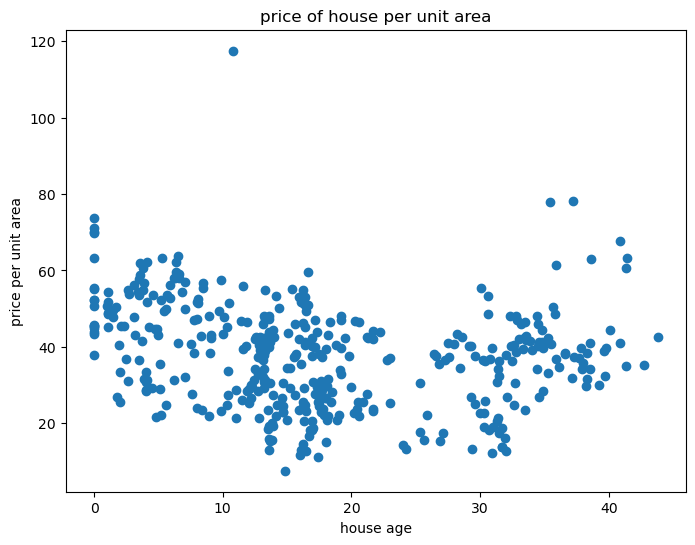

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df["X2 house age"],df["Y house price of unit area"])
plt.xlabel("house age")
plt.ylabel("price per unit area")
plt.title("price of house per unit area")
plt.show()

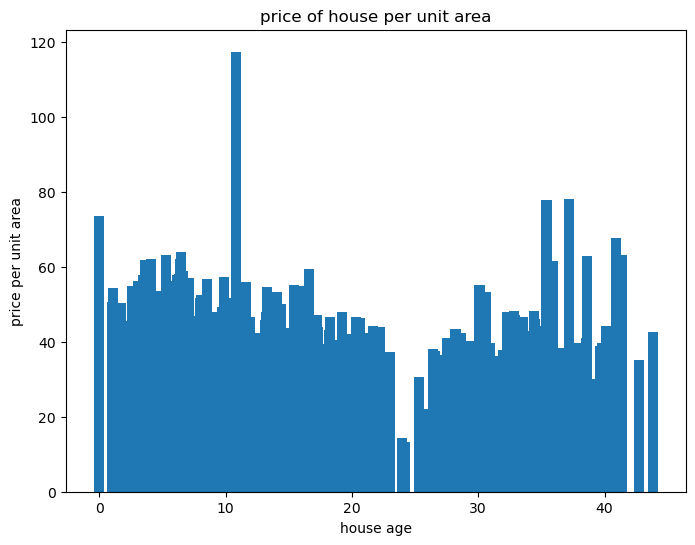

In [34]:
 plt.figure(figsize=(8,6))
 plt.bar(df["X2 house age"],df["Y house price of unit area"])
 plt.xlabel("house age")
 plt.ylabel("price per unit area")
 plt.title("price of house per unit area")
 plt.show()

# Task -7 : Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process. 

<Axes: ylabel='Y house price of unit area'>

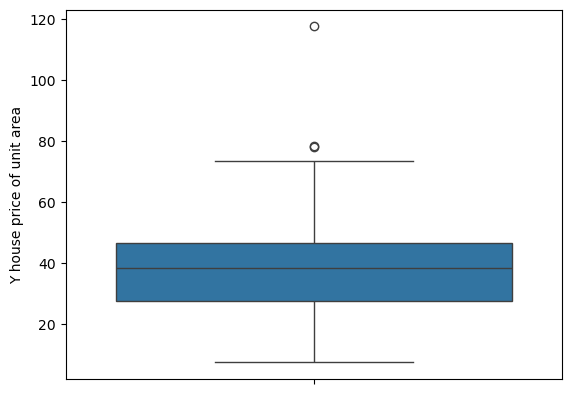

In [19]:
sns.boxplot(df['Y house price of unit area'])

In [20]:
# Calculate the first and third quartiles
Q1 = df['Y house price of unit area'].quantile(0.25)
Q3 = df['Y house price of unit area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df[(df['Y house price of unit area'] >= lower_bound) & (df['Y house price of unit area'] <= upper_bound)]


<Axes: ylabel='Y house price of unit area'>

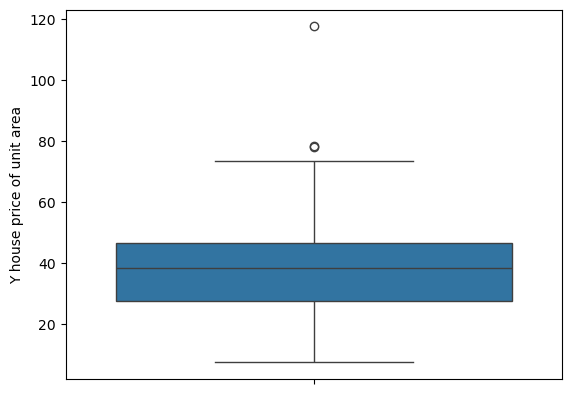

In [21]:
sns.boxplot(df['Y house price of unit area'])

In [24]:
filtered_data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
